## Práctica 3. Clasificación

Ahora vamos a trabajar con redes neuronales desde un Notebook de Jupyter. Cuando trabajamos con el playground de Tensorflow tuvimos la restricción de sólo poder usar unos datasets predeterminados y un número limitados de capas y neuronas de la red neuronal. Ahora podremos variar dichos parámetros libremente. 

Estaremos utilizando la librería llamada sklearn y en especial el llamado Multiple layer perceptron classifier (MLPClassifier). Puedes ver los detalles de dicha librería y el MLPClassifier en la liga siguiente:

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Comencemos con importar las librerías necesarias:

In [1]:
#import matplotlib.pyplot as plt   
from sklearn.datasets import fetch_mldata  # con esto podremos importar datasets para hacer pruebas
from sklearn.neural_network import MLPClassifier  # con esto importamos nuestro clasificador
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline  

Estaremos trabajando con unos de los datasets mas usados para hacer pruebas en Machine Learning, set trata del llamado MNIST dataset, que consiste en 70,000 imágenes escaneadas de dígitos escritos a mano. Las categorías a las que pertenecen son obviamente los números 0,1,2,...,9.

Carguemos los datos (es posible que demore un poco, ten paciencia):

In [2]:
digitos_mnist = fetch_mldata("MNIST original")   

Veamos de que tipo de objeto se trata

In [3]:
type(digitos_mnist)

sklearn.utils.Bunch

Veamos su contenido:

In [4]:
digitos_mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Veamos cuantos datos contiene:

In [5]:
digitos_mnist.data.shape

(70000, 784)

In [6]:
digitos_mnist.target.shape

(70000,)

Con esto podemos ver que contiene 70,000 entradas con un largo de 784. Esto corresponde a los 784 pixeles de una imagen de 28x28.

Ahora tomemos cualquier entrada del arreglo de 70,000 dígitos para poder visualizarla:

In [7]:
entrada = 30000  #tomar cualquier número entre 0 y 69999
ejemplo = digitos_mnist.data[entrada]
ejemplo = ejemplo.reshape((28, 28))

Visualicemos al ejemplo

In [8]:
ejemplo

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

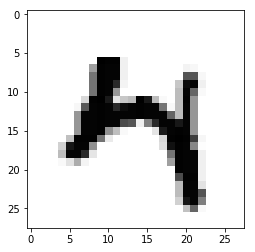

In [9]:
plt.plot(111)
plt.imshow(ejemplo, cmap='Greys',  interpolation='nearest')
plt.show()


Ahora dividimos los datos entre entrenamiento y pruebas

In [10]:
X, y = digitos_mnist.data / 255., digitos_mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [11]:
modelo = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [13]:
modelo.fit(X_train, y_train)

Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320
Iteration 11, loss = 0.04188246
Iteration 12, loss = 0.03864420
Iteration 13, loss = 0.03513415
Iteration 14, loss = 0.03222310
Iteration 15, loss = 0.02956183
Iteration 16, loss = 0.02620840
Iteration 17, loss = 0.02424569
Iteration 18, loss = 0.02129204
Iteration 19, loss = 0.02030622
Iteration 20, loss = 0.01848272


/Users/vcubells/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=20, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [14]:
 modelo.score(X_train, y_train)


0.99533333333333329

In [15]:
modelo.score(X_test, y_test)

0.97209999999999996

In [16]:
digitos_mnist.data[entrada].shape

(784,)

In [17]:
digito_esperado = digitos_mnist.target[entrada]
digito_esperado

4.0

In [18]:
#try1=digitos_mnist.data[entrada].reshape(784,1)

In [19]:
#digitos_mnist.data[entrada].shape

In [20]:
digito_predicho = modelo.predict([digitos_mnist.data[entrada]])

In [21]:
digito_predicho

array([ 4.])